# Приоритизация гипотез для крупного интернет-магазина.

Перед нами задача касающаяся аналитики крупного интернет-магазина. Вместе с отделом маркетинга нам необходимо подготовить список гипотез, которые помогут увеличить выручки. В дальнейшем при помощи конкретных методов мы приоретизируем гипотезы, проведем A/B-тестирование, проанализируем результат. В конце примем решение касательно того, какие гипотезы считать приоритетными.

### План работы:
1. Импортирование необходимых библиотек
2. Знакомство с данными. Первичный анализ данных и если необходимо предобработка данных
3. Исследовательский анализ данных:


##### Часть 1. Приоритизация гипотез:
   - a) Применение фреймворка ICE. Вывод
   
   
   - b) Применение фреймворка RICE. Вывод
   
   
   - c) Сравнение приоритизации гипотез при применении RICE и ICE. Вывод


##### Часть 2. Анализ A/B-теста:


   - d) Построить график кумулятивной выручки по группам. Вывод
   
   
   - e) Построить график кумулятивного среднего чека по группам. Вывод
   
   
   - f) Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Вывод
   
   
   - g) Построить график кумулятивной конверсии по группам. Вывод
   
   
   - h) Построить график относительного изменения кумулятивной конверсии группы B к группе A. Вывод
   
   
   - i) Построить точечный график количества заказов по пользователям. Вывод
   
   
   - j) Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
   
   
   - k) Построить точечный график стоимостей заказов. Вывод
   
   
   - l) Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов. Вывод
   
   
   - n) Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Вывод
   
   
   - o) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Вывод
   
   
   - p) Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Вывод
   
   
   - q) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Вывод
   
   
   - r) Принять решение по результатам теста и объяснить его.

###### Данные:
Таблица **/datasets/hypothesis.csv.**:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы;

Таблица **/datasets/orders.csv.**:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ;

Таблица **/datasets/visitors.csv.**:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста;

### Импортирование необходимых библиотек

In [1]:
import warnings 
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import rcParams
pd.set_option('display.max_colwidth', -1)

### Знакомство с данными. Первичный анализ данных и предобработка данных.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep = ',') 

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


###### Как мы видим названия столбцов начинаются с заглавной буквы. Приведем названия столбцов в таблице 'hypothesis' к нижнему регистру.

In [4]:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep = ',')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


###### Теперь нам будем проще избежать путаницы и не нужных ошибок в дальнейшем.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


###### Cтолбец 'date' имеет тип 'object', что помешает нам в дальнейшем проводить математические операции с ним. Приведем данные столбца 'date'  к типу данных 'datetime'.

In [7]:
orders['date']= pd.to_datetime(orders['date'], format='%Y.%m.%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv', sep = ',')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


###### Похожая ситуация сo столбцом 'date' как и в предыдущей таблице. Необходимо перевести данные этого столбца к типу 'datetime'

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


###### Теперь типы данных с таблице соответствуют необходимым. Мы можем спокойно приступать к исследовательской части. 

### Исследовательский анализ данных

###### ЧАСТЬ 1.ПРИОРИТЕЗАЦИЯ ГИПОТЕЗ

###### Применение фреймворка ICE

In [11]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis ['efforts']

In [12]:
hypothesis.sort_values(by='ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


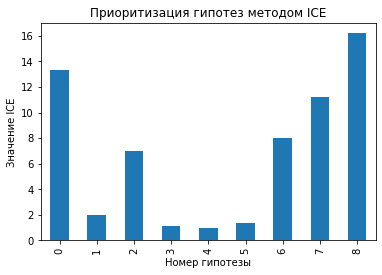

In [13]:
hypothesis['ice'].plot(kind='bar')
plt.ylabel('Значение ICE')
plt.xlabel('Номер гипотезы')
plt.title('Приоритизация гипотез методом ICE');

#### Вывод:
Как мы видим самыми приоритетным гипотезами по ICE являются гипотезы: 8, 0, 7, 6, 2

######  Применение фреймворка RICE

In [14]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [15]:
hypothesis.sort_values(by='rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


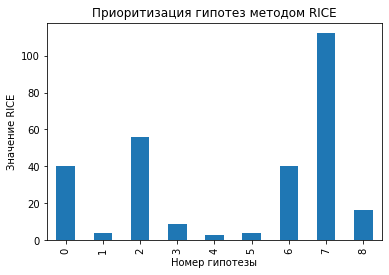

In [16]:
hypothesis['rice'].plot(kind='bar')
plt.ylabel('Значение RICE')
plt.xlabel('Номер гипотезы')
plt.title('Приоритизация гипотез методом RICE');

#### Вывод

Если смотреть на приоритизацию гипотез по RICE, то наиболее приоритетными будут так же гипотезы: 7, 2, 0, 6, 8.

######  Сравнение приоритизации гипотез при применении RICE и ICE

Как мы видим по RICE и по ICE в первой пятерке присутвуют одни и теже гипотезы, однако порядок гипотез по ICE (8, 0, 7, 6, 2) и RICE (7, 2, 0, 6, 8 ) разнитца. Это связано с тем что параметр Reach ('охват') в методе RICE, больше у 7 и 2 гипотезы. Конечно метод ICE показывает нам силу гипотезы, но стоит не забывать так же учитывать как много пользователей затронет та или иная гипотеза. В конечном счете считаю фреймворк RICE более приоритетным по сравнению с фреймворком ICE. 

### Часть 2. Анализ A/B-теста:

Для начала займемся подготовкой данных

In [17]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [18]:
# Получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Объединим кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Присвоим столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
orders      62 non-null int64
buyers      62 non-null int64
revenue     62 non-null int64
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


###### Построим график кумулятивной выручки по группам.

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

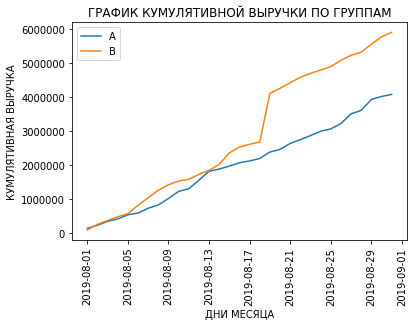

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('ДНИ МЕСЯЦА')
plt.ylabel('КУМУЛЯТИВНАЯ ВЫРУЧКА')
plt.title('ГРАФИК КУМУЛЯТИВНОЙ ВЫРУЧКИ ПО ГРУППАМ');

#### Вывод

Судя по графику можно сказать что по началу кумулятивная выручка росла равномерно по обеим групам, но после двух недель выручка группы B существенно выросла относительно группы А. 

Так же хотелось бы обратить внимание на скачок в районе 19.08. По-моему мнению здесь есть две причины объясняющие данное явление:
   - 1) Мы привлекли в данной отметке 'аномальных' пользователей, заказы которых повлияли на кумулятивные выручки группы В.
   - 2) За счет удачной реальзации варианта В в нашем тесте возросло количество пользователей, которым вариант В показался более привлекательным.

###### Построить график кумулятивного среднего чека по группам

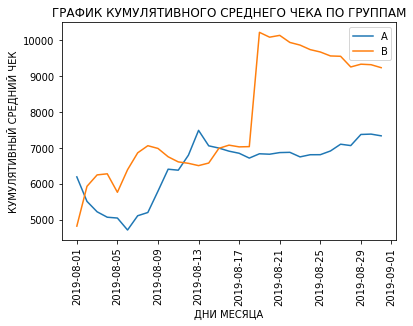

In [23]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation='vertical')
plt.legend()
plt.xlabel('ДНИ МЕСЯЦА')
plt.ylabel('КУМУЛЯТИВНЫЙ СРЕДНИЙ ЧЕК')
plt.title('ГРАФИК КУМУЛЯТИВНОГО СРЕДНЕГО ЧЕКА ПО ГРУППАМ');

#### Вывод

Такая же картина обстоит и со средним чеком. Первые две недели средний чек не стабилен в обеих группах, но в дальнейшем средний чек группы B резко вырос по отношению к группе А.

Как мы видим при анализе кумулятивного среднего чека так же наблюдается резкий рост в районе 19.08. По-моему это так же связанно с появлением крупных заказов, с последующим стабильным снижением. Скорее всего снижение обусловленно падением интереса пользователей. Думаю стоит провести доработки гипотезы в группе В.

###### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

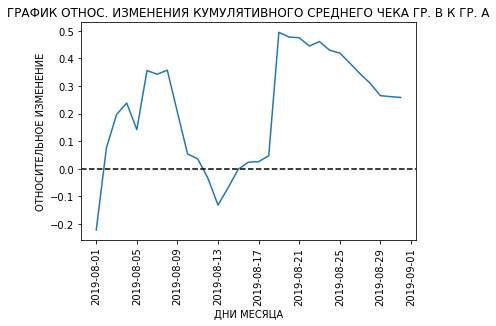

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation='vertical')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ДНИ МЕСЯЦА')
plt.ylabel('ОТНОСИТЕЛЬНОЕ ИЗМЕНЕНИЕ')
plt.title('ГРАФИК ОТНОС. ИЗМЕНЕНИЯ КУМУЛЯТИВНОГО СРЕДНЕГО ЧЕКА ГР. В К ГР. А');

#### Вывод

В нескольких точках график различия между сегментами резко скачет, скорее всего это связанно с тем, что в данных присутствуют  крупные заказы и выбросы.

###### Построим график кумулятивной конверсии по группам

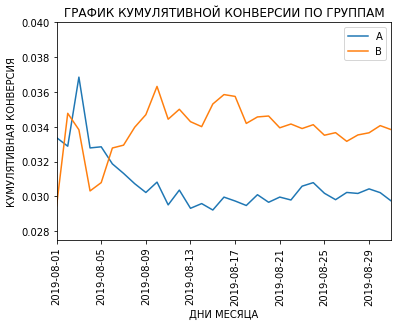

In [25]:
# Посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# ПОстроим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation='vertical')
plt.axis(["2019-08-01", '2019-08-31', 0.0275, 0.04])
plt.legend()
plt.xlabel('ДНИ МЕСЯЦА')
plt.ylabel('КУМУЛЯТИВНАЯ КОНВЕРСИЯ')
plt.title('ГРАФИК КУМУЛЯТИВНОЙ КОНВЕРСИИ ПО ГРУППАМ');

#### Вывод

Мы получили симметричный график. По началу конверсия группы А была выше, но это было не долго. Буквально через пару дней конверсия группы В вышла вперед.

Хотелось бы добавить, что при таких скачках какие мы наблюдаем в самом начале тестирования, всегда необходимо дождаться стабилизации графиков, иначе мы можем принять неверные решения касательно наших гипотез. А это в свою очередь чревато необоснованными финансовыми потерями.

###### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

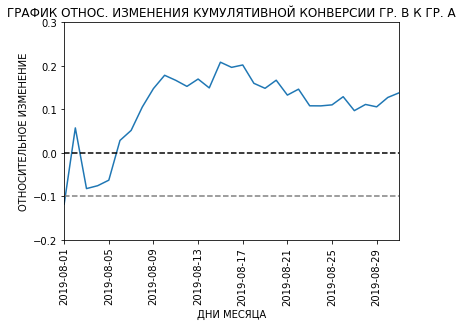

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation='vertical')
plt.axis(['2019-08-01', '2019-08-31', -0.2 , 0.3])


plt.xlabel('ДНИ МЕСЯЦА')
plt.ylabel('ОТНОСИТЕЛЬНОЕ ИЗМЕНЕНИЕ')
plt.title('ГРАФИК ОТНОС. ИЗМЕНЕНИЯ КУМУЛЯТИВНОЙ КОНВЕРСИИ ГР. В К ГР. А');

#### Вывод

В начале теста группа В немного проигрывала группе А, но затем быстро начала расти. Конверсия группы В прочно закрепилась в лидерах, думаю в дальнейшем она будет идти только в вверх.

##### Построим точечный график количества заказов по пользователям

In [27]:
ordersByUsers = orders.drop(['group','revenue','date'], axis = 1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
ordersByUsers

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


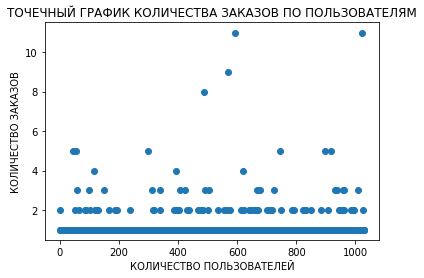

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])
plt.xlabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.ylabel('КОЛИЧЕСТВО ЗАКАЗОВ')
plt.title('ТОЧЕЧНЫЙ ГРАФИК КОЛИЧЕСТВА ЗАКАЗОВ ПО ПОЛЬЗОВАТЕЛЯМ');

#### Вывод

Большая часть пользователей сделала в основном только одни заказ. Есть пользователи совершившие от 2 до 4 заказов. Их не так много. И есть пользователи с так называемым "аномальным количеством заказов". 

###### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем так же границу для определения аномальных пользователей.

In [29]:
print(np.percentile(ordersByUsers['orders'], [95,96,97,98,99]))

[2. 2. 2. 3. 4.]


#### Вывод

Предлагаю выбрать верхней границей опрделения аномальных пользователей тех, кто совершил не более двух заказов.

###### Построим точечный график стоимостей заказов

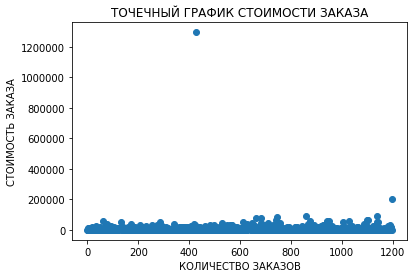

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.xlabel('КОЛИЧЕСТВО ЗАКАЗОВ')
plt.ylabel('СТОИМОСТЬ ЗАКАЗА')
plt.title('ТОЧЕЧНЫЙ ГРАФИК СТОИМОСТИ ЗАКАЗА');

#### Вывод

По графику можно сказать что у основной части заказов стоимоть не превышала 100000. Посмотрим что скажут нам 95 и 99 перцентили.

###### Посчитаем 95-ый  и 99-й перцентили стоимости заказов. Выберем так же границу для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не совсем понятно какое число выбрать как верхнюю границу для определения аномальных заказов. Рассмотри весь диапозон перцентелей с 95-ого по 99-ый.

In [32]:
print(np.percentile(orders['revenue'], [95,96,97,98,99]))

[28000.  31382.  35485.  44133.2 58233.2]


#### Вывод

Предлагаю выбрать верхней границей определения аномальных заказов те, стоимость которых не превышает 30000.

### Посчитаем статистические значимости различий в конверсии и в среднем чеке между группами.

##### Подготовим данные

In [33]:
# Рассчитаем количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Рассчитаем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Рассчитаем количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


# Рассчитаем количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


# Рассчитаем количество уникальных заказов в выбранную дату включительно в группе А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


# Рассчитаем cуммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


# Рассчитаем количество уникальных заказов в выбранную дату включительно в группе B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


# Рассчитаем cуммарное число заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Объеденим все данные в одну таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [34]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### Данные готовы, сформулируем гипотезы.   

###### Конверсия по сырым данным:
- Гипотеза H₀: статистически значимых различий в конверсии между группами нет.
- Гипотеза H₁: статистически значимые различия в конверсии между группами есть.

###### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [35]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                  .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                  .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


##### Вывод

Первое число 0.008 уровень значимости (p-value) не превышает 0.05, следовательно нулевую гипотезу отвергаем (статистически значимых различий в конверсии между группами по «сырым» данным нет). Что касается относительного прироста групп: то группа В в выигрыше на 13,8 %.

###### Средний чек по сырым данным:
-  Гипотеза H₀:  различия в среднем чеке заказа между группами есть.
-  Гипотеза H₁:  различия в среднем чеке заказа между группами отсутствуют.

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [36]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


##### Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Прирост среднего чека группы B значительно выше среднего чека группы A

###### Конверсия по «очищенным» данным:
- Гипотеза H₀: статистически значимых различий в конверсии между группами нет.
- Гипотеза H₁: статистически значимые различия в конверсии между группами есть.

###### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [37]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
                                                                                                                                                 

0.007
0.172


##### Вывод

Первое число 0.007 уровень значимости (p-value) уменьшилось и так же не превышает 0.05, следовательно нулевую гипотезу все так же отвергаем. Что касается относительного прироста групп по "очищенным данным": то группа В уже в выигрыше на 17 %, по сравнению с 13% в сырых данных.

###### Средний чек по «очищенным» данным:
-  Гипотеза H₀:  различия в среднем чеке заказа между группами есть.
-  Гипотеза H₁:  различия в среднем чеке заказа между группами отсутствуют.

###### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [38]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.360
-0.023


##### Вывод

P-value уменьшился, но не на много, поэтому мы так же смело можем говорить о том что нулевую гипотезу мы не отвергаем. Но и разница между сегментами значительно уменьшилась.

# Общий вывод:

И так проведя исследовательский анализ мы имеем следующее:
  - 1) Статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
  - 2) Статистически значимые различия по среднему чеку между группами по «сырым» данным, а вот по данным после фильтрации аномалий различия не большие. Это лишний раз нам говорит о значимом влиянии выбросов на рещультаты;
  - 3) График различия конверсии между группами сообщает, что результаты группы B лучше группы A, и у группы B есть значительная тенденция к улучшению.
  
На основе этого предлагаю остановить тест, и признать группу B победителем. 